In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

This is programming assignment for week 4. In this assignment you will be solving classification task and performing exploratory data analysis. 

### Grading
The assignment contains both automatically graded and peer reviewed tasks. 

**Automatic grading**
After you finish solving all the tasks restart the kernel (`kernel -> restart`) and and click button `Validate` to check that everything works as expected. Afterwards, you can submit your work.

**Peer Review**
Some of the tasks cannot be checked automatically,  therefore, we'll be using peer review. Please, download this notebook with solutions (`File → Download as → Notebook (.ipynb)`) and submit it for peer review. Each peer reviewed task contains grading instructions. 


# Table of Contents:
* [Part1.](#part1) EDA and Feature Engineering
    - [Explore the Target Variable](#target)
    - [Categorical Features](#cat_features)
        - [Task 1](#task1) [2 pts]
        - [Task 2](#task2) [1 pt]
        - [Task 3](#task3) [1 pt]
        - [Task 4](#task4) [1 pt]
        - [Task 5](#task5) [peer review]
    - [Ordinal and numeric features](#rest_features)
        - [Task 6](#task6) [peer review]
        - [Task 7](#task7) [1 pt]
        - [Task 8](#task8) [peer review]
        - [Task 9](#task9) [1 pt]
    - [Missing values](#na)
        - [Task 10](#task10) [1 pt]
        - [Task 11](#task11) [2 pts]
    - [Columns transformers](#columns)
        - [Task 12](#task12) [2 pts]
    - [Train-test split](#train_test)
* [Part2](#part2). Training, comparing and testing models
    - [Task 13](#task13) [1 pt]
    - [Task 14](#task14) [1 pt]
    - [Task 15](#task15) [2 pts]

# Part 1. Exploratory Data Analysis (EDA) and Feature Engineering <a class="anchor" id="part1"></a>


### The goal
Explore the data, fix NAs, check if there are some mistakes and outliers, preprocess and select relevant features before fitting the model.


## 0. Explore the dataset and the task

Below you can find the dataset, which you will be working with in this assignment. It contains information about the passangers of the Titanic. The target variable that we are going to predict is `Survived`. It is a binary variable which indicates whether a given passenger survived in the Titanic catastroph.

In [4]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have data for Titanic passengers, the goal is to predict the column `Survived`.

## 1.1 Explore the target <a class="anchor" id="target"></a>

To begin with, let us plot the barplot for the traget variable. It is very convenient to use wrapper around `matplotlib` provided by `pandas`. You can read about it [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook-plotting).

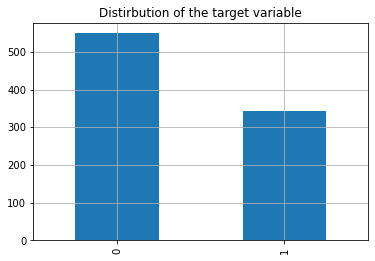

In [5]:
titanic.Survived.value_counts().plot(kind='bar')
plt.grid()
plt.title('Distirbution of the target variable');

---
## 1.2 Explore categorical features <a class="anchor" id="cat_features"></a>


We will start from creating a new feature called `Title`. By the title we mean the name prefix, such as `Mr`, `Miss`, `Dr` etc. It may tell us a lot about age or family status of the passenger even if this information is missing from the dataset. 

Let us take a look at some of the `Name` values. You can see that for each passenger name is organised as: 

```
Surname, Title. Name
```

In [6]:
titanic.Name[:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

---
**Task 1** [2 pts] Add a new column `Title` to the `titanic` dataframe. <a class="anchor" id="task1"></a>

*Hints:* 
1. You need to extract part of the string from each value of the `Name` column
2. `pandas.Series.str` has wide variaty of vectorized string functions. That is, if you run `titanic.Name.str.useful_function()`, then `useful_function()` will be applied to each element of the column `Name`. Take a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html) for more details and the list of "useful functions".
3. You'll likelily need to apply regular expressions (but it is also to possible to do the task without it). Do not worry, it is nothing sophisticated. Here is all you need to know:
 * `[a-zA-Z]` - refers to any letter 
 * `\.` - refers to the dot
 * `\,` - refers to the comma
 * `+` - means that the element repeats 1 or more times. E.g. `\.+` means 1 or more dots
 * `\s` - refers to any spacing sign 
4. Extract the title without the dot that goes after it

In [7]:
t1 = titanic.Name.str.split(',', expand=True)[1]
t2=t1.str.split(expand=True)[0]
t3 = t2.str.split(pat=".",expand=True)
titanic['Title']=t3[0]

In [8]:
print(titanic['Title'].value_counts())

assert titanic['Title'].value_counts().shape[0] == 17, 'Wrong number of unique titles. 17 is expected'
assert titanic['Title'].value_counts().Mr == 517, 'Wrong number of passengers with the Title `Mr`. 517 is expected'
assert titanic['Title'].value_counts().Miss == 182, 'Wrong number of passengers with the Title `Miss`. 182 is expected'
assert titanic['Title'].value_counts().Dr == 7, 'Wrong number of passengers with the Title `Dr`. 7 is expected'
names = ['Newell, Miss. Madeleine', 'Gale, Mr. Shadrach', 'Moubarek, Master. Halim Gonios ("William George")']
titles = ['Miss', 'Mr', 'Master']
for n, t in zip(names, titles):
    assert titanic.Title[titanic.Name == n].values == t, 'Wrong title for the passenger {}'.format(n)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
the           1
Jonkheer      1
Mme           1
Sir           1
Lady          1
Don           1
Ms            1
Name: Title, dtype: int64


<a class="anchor" id="task2"></a>
You can see that some titles are very rare, which makes their usefulness questionable. We will now combine all the titles which has 6 or less observations into one category called `Other`.

---
**Task 2** [1 pt]. Create a vector `proper_titles` which contains all titles with > 6 observations. For all the passengers, who have title not from the `proper_titles` list, rename their `Title` to `Other`.

In [9]:
# your code here
df_counts=titanic['Title'].value_counts()
proper_titles = set(df_counts.where(df_counts>6).dropna().index)

def f(x):
    if x['Title'] in proper_titles:
        return x['Title']
    return 'Other'

titanic['Title'] = titanic.apply(f, axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [10]:
print(proper_titles)
print()
print(titanic.Title.value_counts())

assert titanic.Title.value_counts().shape[0] == 6
assert sum(titanic.Title == 'Other') == 20
CORRECT_proper_titles = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr']
for p in CORRECT_proper_titles:
    assert p in proper_titles, 'Title {} is expected to be in the list of proper titles'.format(p)

{'Dr', 'Miss', 'Mrs', 'Master', 'Mr'}

Mr        517
Miss      182
Mrs       125
Master     40
Other      20
Dr          7
Name: Title, dtype: int64


---
<a class="anchor" id="task3"></a>
**Task 3** [1 pt] Obtain the list of all the categorical columns (columns with data type `object`). Name this list `categ_columns`.

In [11]:
# your code here
titanic.columns
categ_columns = ['Name','Title','Sex','Ticket','Cabin','Embarked']

In [12]:
print(categ_columns)

assert 'Title' in categ_columns, 'Columns `Title` not in the list'
assert 'Name' in categ_columns, 'Columns `Name` not in the list'
assert 'Sex' in categ_columns, 'Columns `Sex` not in the list'
assert 'Ticket' in categ_columns, 'Columns `Ticket` not in the list'
assert 'Cabin' in categ_columns, 'Columns `Cabin` not in the list'
assert 'Embarked' in categ_columns, 'Columns `Embarked` not in the list'

['Name', 'Title', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Let us explore these categorical features in more details. We will use method `describe` to obtain some statistics about them. 

In [13]:
titanic[categ_columns].describe(include='object')

,Name,Title,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,891,6,2,681,147,3
top,"Ilmakangas, Miss. Pieta Sofia",Mr,male,1601,C23 C25 C27,S
freq,1,517,577,7,4,644


Sometimes, categorical columns contain too many unique values, which do not have a lot of information about the task we are solving. There are cases, when it is possible to extract some useful details from such variables (as we just did with the `Name`). But if you can't it might be better to drop such variable. 


---
<a class="anchor" id="task4"></a>
**Task 4** [1 pt] Remove all the categorical features, which have more than 100 unique values. 

P.S. Remove the corresponding columns from the dataframe `titanic` and unpdate list of categorical feature `categ_columns` to contain only categorical features that are left. 

In [14]:
# your code here
s1=titanic[categ_columns].describe(include='object').T
unique_names=s1.where(s1.unique<=100)
categ_columns = set(unique_names.unique.dropna().index)
titanic = titanic.drop(['Cabin','Ticket','Name'],axis=1)





In [15]:
print(categ_columns)

titanic[categ_columns].head()

CORRECT_categ = set(['Sex', 'Embarked', 'Title'])
diff = list(CORRECT_categ - set(categ_columns))
assert len(diff) == 0, '`categ_columns` is missing columns'
diff = list(set(categ_columns) - CORRECT_categ)
assert len(diff) == 0, '`categ_columns` has too amny columns'   

{'Title', 'Embarked', 'Sex'}


Let's consider distribution of all the categorical features now

---
<a class="anchor" id="task5"></a>
**Task 5** [Peer Reviewed] For each categorical feature draw two bar plots side by side. On the first plot, height of the bar should depict number of passengers in each category, while on the second, height of the bar should depict propostion of survived passengers in the category. 

In [16]:
display(titanic[titanic['Survived'] == 1].Sex.value_counts().sort_index())
display(titanic.Sex.value_counts().sort_index())

female    233
male      109
Name: Sex, dtype: int64

female    314
male      577
Name: Sex, dtype: int64

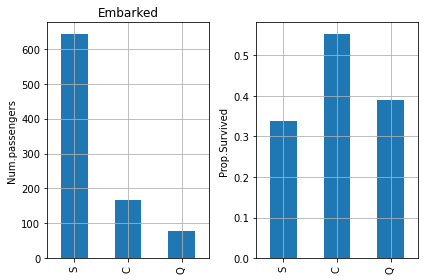

In [17]:
# your code here
plt.subplot(1, 2, 1)
titanic.Embarked.value_counts().plot(kind='bar')
plt.grid()
plt.title('Embarked');
plt.ylabel('Num.passengers')

plt.subplot(1, 2, 2)
(titanic[titanic['Survived'] == 1].Embarked.value_counts() / titanic.Embarked.value_counts()).plot(kind='bar')
plt.grid()
#plt.title('Embarked');
plt.ylabel('Prop.Survived')

plt.tight_layout()

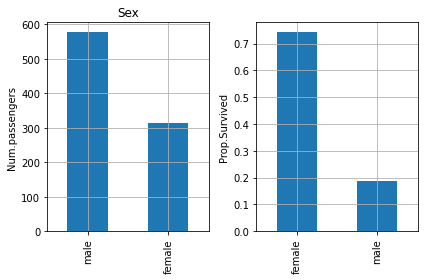

In [18]:
plt.subplot(1, 2, 1)
titanic.Sex.value_counts().plot(kind='bar')
plt.grid()
plt.title('Sex');
plt.ylabel('Num.passengers')

plt.subplot(1, 2, 2)
(titanic[titanic['Survived'] == 1].Sex.value_counts().sort_index() / titanic.Sex.value_counts().sort_index()).plot(kind='bar')
plt.grid()
#plt.title('Embarked');
plt.ylabel('Prop.Survived')

plt.tight_layout()

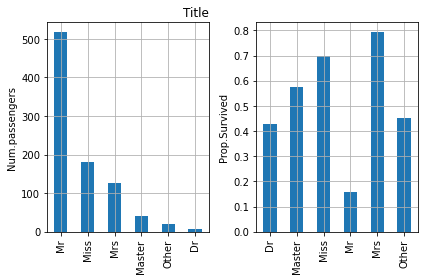

In [19]:
plt.subplot(1, 2, 1)
titanic.Title.value_counts().plot(kind='bar')
plt.grid()
plt.title('Title',loc='Right');
plt.ylabel('Num.passengers')

plt.subplot(1, 2, 2)
(titanic[titanic['Survived'] == 1].Title.value_counts().sort_index() / titanic.Title.value_counts().sort_index()).plot(kind='bar')
plt.grid()
plt.ylabel('Prop.Survived')

plt.tight_layout()

**Peer Review Grading.** Below you can find the correct plots for this task. Please, compare them to the plots produced by the code above. Please, do not pay attention to the order in which graphs are ploted.

<img src="correct_plot_Embarked.png" width=600 height=600 />
<img src="correct_plot_Sex.png" width=600 height=600 />
<img src="correct_plot_Title.png" width=600 height=600 />

---
## 1.3 Ordical and Numeric Features <a class="anchor" id="rest_features"></a>

Now consider the rest of the dataset. Below you can see the first few observations from all the non-categorical features.

In [20]:
titanic[[c for c in titanic.columns if c not in list(categ_columns) + ['Survived']]].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


---
<a class="anchor" id="task6"></a>
**Task 6** [Peer graded] We suggest removing the feature `PassengerID` from the dataset. Please do it below and write your comment on why this is a resonalbe thing to do. 

In [21]:
# your code here
titanic=titanic.drop('PassengerId', axis = 1)

```Your comment here```
Column with PassengerId does not contain any valuable information, just a count number of the passenger in alphabetic order. This column contains a lot of unique values which we can't compare.

In [22]:
assert 'PassengerId' not in titanic.columns

**Peer Review Grading.** Please read the comment above and check the validity of the arguments

---
Consider two columns: `SibSp` and `Parch`. The first one is responsibel for number of Siblings/Spouses aboard the Titanic for the given passenger. The second one - number of parents/childer aboard the Titanic. Note that we can create one variable `FamilySize` out of these two. 

<a class="anchor" id="task7"></a>
**Task 7** [1 pt] Create a variable `FamilySize` as a total size of the passenger's family aboard. Remove columns `SibSp` and `Parch` from the dataset afterwards. 

In [23]:
# your code here
titanic['FamilySize']=titanic['SibSp']+titanic['Parch']
titanic = titanic.drop('SibSp', axis = 1)
titanic = titanic.drop('Parch', axis = 1)
titanic.head

<bound method NDFrame.head of      Survived  Pclass     Sex   Age     Fare Embarked  Title  FamilySize
0           0       3    male  22.0   7.2500        S     Mr           1
1           1       1  female  38.0  71.2833        C    Mrs           1
2           1       3  female  26.0   7.9250        S   Miss           0
3           1       1  female  35.0  53.1000        S    Mrs           1
4           0       3    male  35.0   8.0500        S     Mr           0
..        ...     ...     ...   ...      ...      ...    ...         ...
886         0       2    male  27.0  13.0000        S  Other           0
887         1       1  female  19.0  30.0000        S   Miss           0
888         0       3  female   NaN  23.4500        S   Miss           3
889         1       1    male  26.0  30.0000        C     Mr           0
890         0       3    male  32.0   7.7500        Q     Mr           0

[891 rows x 8 columns]>

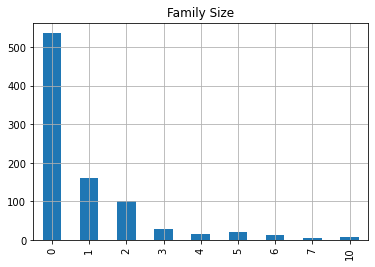

In [24]:
titanic.FamilySize.value_counts().sort_index().plot(kind='bar')
plt.title('Family Size')
plt.grid()

assert 'SibSp' not in titanic.columns
assert 'Parch' not in titanic.columns
assert sum(titanic.FamilySize == 0) == 537
assert sum(titanic.FamilySize == 10) == 7

---
Let us work with the variable `FamilySize` even further. Turns out, that sometimes it is reasonable to convert numerical feature into ordinal ones. E.g. instead of having a family size we can group peopple into `single`, `small_family`, etc. In this manner we can enforce larger distinction between people who do not have family at all and those who have small families. At the same time we can say that for the sake of our application we do not need to distiguish family of size 1 from the family of size 2. 

<a class="anchor" id="task8"></a>
**Task 8** [Peer Graded]. Plot the bar plot for the variable `FamilySize` where the height of the bar is determined by the proportion of the survived passengers. Based on the created plot split all the passengers into tree groups. For each group create a binary variable `FamilySize_1`, `FamilySize_2` and `FamilySize_3`. Justify the split that you've chosen.

Text(0, 0.5, 'Prop.Survived')

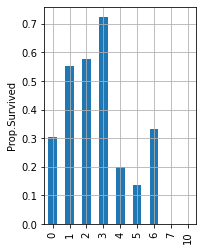

In [25]:
# your code here
plt.subplot(1, 2, 2)
(titanic[titanic['Survived'] == 1].FamilySize.value_counts().sort_index() / titanic.FamilySize.value_counts().sort_index()).plot(kind='bar')
plt.grid()
plt.ylabel('Prop.Survived')



In [26]:
def familysize1(x):
    if x.FamilySize==0:
        return 1

def familysize2(x):
    if x.FamilySize in [1,2,3]:
        return 1
    
def familysize3(x):
    if x.FamilySize>3:
        return 1

In [27]:
titanic['FamilySize_1']=titanic.apply(familysize1, axis=1)
titanic['FamilySize_1']=titanic['FamilySize_1'].fillna(0)
titanic['FamilySize_2']=titanic.apply(familysize2, axis=1)
titanic['FamilySize_2']=titanic['FamilySize_2'].fillna(0)
titanic['FamilySize_3']=titanic.apply(familysize3, axis=1)
titanic['FamilySize_3']=titanic['FamilySize_3'].fillna(0)
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,FamilySize_1,FamilySize_2,FamilySize_3
0,0,3,male,22.0,7.2500,S,Mr,1,0.0,1.0,0.0
1,1,1,female,38.0,71.2833,C,Mrs,1,0.0,1.0,0.0
2,1,3,female,26.0,7.9250,S,Miss,0,1.0,0.0,0.0
3,1,1,female,35.0,53.1000,S,Mrs,1,0.0,1.0,0.0
4,0,3,male,35.0,8.0500,S,Mr,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Other,0,1.0,0.0,0.0
887,1,1,female,19.0,30.0000,S,Miss,0,1.0,0.0,0.0
888,0,3,female,NaN,23.4500,S,Miss,3,0.0,1.0,0.0
889,1,1,male,26.0,30.0000,C,Mr,0,1.0,0.0,0.0


In [28]:
assert 'FamilySize_1' in titanic.columns
assert 'FamilySize_2' in titanic.columns
assert 'FamilySize_3' in titanic.columns
assert titanic.FamilySize_1.sum() + titanic.FamilySize_2.sum() + titanic.FamilySize_3.sum() == 891
assert titanic.FamilySize_1.sum() > 0
assert titanic.FamilySize_2.sum() > 0
assert titanic.FamilySize_3.sum() > 0

```your comment here```
1.If we check the plot below, we can see that there's a big cluster of passengers with 1-3 family members, so it is reasonable to place them in same group. 
2.I'd like to make singles (familysize = 0) as a single group because to my mind being single at the sinking titanic might be benificial(we will check if it's so I hope). 
3.The third group will contain passengers with familysize=4-6.

**Peer Review Grading.** Please check that the plot above is correct (below you can see the correct answer). Also read the comment about the way the passengers were split on the groupd and check that the splitting is reasonable.

<img src="task8_corrrect.png" width=400 height=400 />


---

Basically, we've just converted numerical feature `FamilySize` into categorical one with three categories. Moreover, we've simultaniously performed One-hot encoding of this categorical feature and obtained three binary variables. Now we can drop the feature `FamilySize` as it is not needed anymore.

In [29]:
titanic.drop(['FamilySize'], axis=1, inplace=True)

---
<a class="anchor" id="task9"></a>
**Task 9** [1 pt]. We have three features left unexplored. They are `Pclass`, `Age` and `Fare`. The frist one stands for the ticket class, second - for the age of the passenger and the fird one gives us price of the ticket. 

Please, create `ordinal_cols`, which will be list of all the ordinal columns (put there names of relevant columns) and `numeric_cols` - list with the names of the numeric columns. If there is no ordinal or numeric colums, make the corrisponding list empty.

In [30]:
# your code here
ordinal_cols = ['Pclass']
numeric_cols = ['Age','Fare']

In [31]:
print('Ordinal columns are: ', ordinal_cols)
print('Numeric columns are: ', numeric_cols)

assert len(ordinal_cols) == 1
assert len(numeric_cols) == 2
assert 'Pclass' in ordinal_cols
assert 'Age' in numeric_cols
assert 'Fare' in numeric_cols

Ordinal columns are:  ['Pclass']
Numeric columns are:  ['Age', 'Fare']


We can use different plots to explore numerical features. Below you can find some examples with the variable `Age`.  


We can use histograms or boxplots to see how numerical features depends on the categorical one.
1. Age vs Target


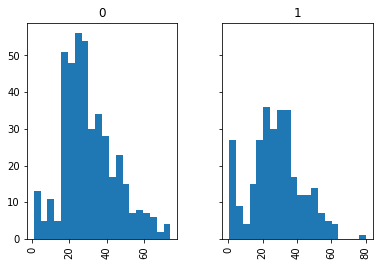


2. Age vs Sex


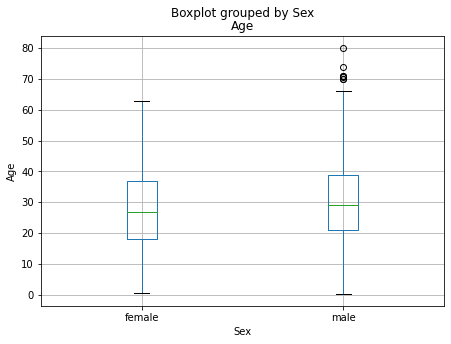

3. Age vs Target


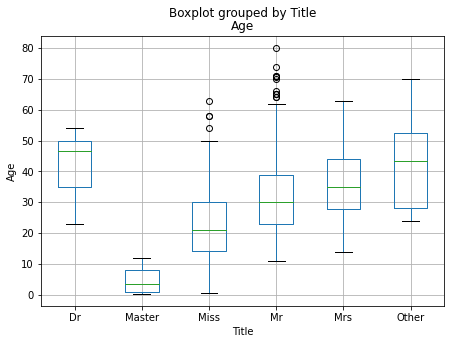


Scatter plots are usefull to spot connection between two numeric features.


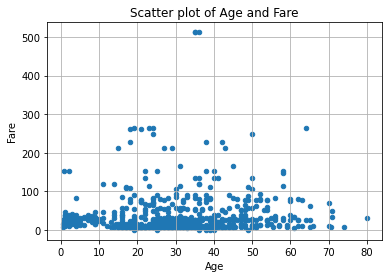

In [32]:
print()
print('We can use histograms or boxplots to see how numerical features depends on the categorical one.')
print('1. Age vs Target')
titanic.hist(column='Age', by='Survived', bins=20, sharey=True);
plt.show();

print()
print('2. Age vs Sex')
titanic.boxplot(column='Age', by='Sex', figsize=(7,5));
plt.ylabel('Age');
plt.show();

print('3. Age vs Target')
titanic.boxplot(column='Age', by='Title', figsize=(7,5));
plt.ylabel('Age');
plt.show();

print()
print('Scatter plots are usefull to spot connection between two numeric features.')
titanic.plot.scatter(x='Age', y='Fare');
plt.grid()
plt.title('Scatter plot of Age and Fare');

One reason, why it is usefull to make such plots is that it may help to fill in missing values. Keep it in mind for the next part of this notebook

---
## 1.3 working with missing values <a class="anchor" id="na"></a>
<a class="anchor" id="task10"></a>
**Task 10** [1 pts] Compute proportion of missing values in each column. Store the answer in the variable `prop_missing`.


In [33]:
#titanic=titanic.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize_1,FamilySize_2,FamilySize_3
0,0,3,male,22.0,7.2500,S,Mr,0.0,1.0,0.0
1,1,1,female,38.0,71.2833,C,Mrs,0.0,1.0,0.0
2,1,3,female,26.0,7.9250,S,Miss,1.0,0.0,0.0
3,1,1,female,35.0,53.1000,S,Mrs,0.0,1.0,0.0
4,0,3,male,35.0,8.0500,S,Mr,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Other,1.0,0.0,0.0
887,1,1,female,19.0,30.0000,S,Miss,1.0,0.0,0.0
888,0,3,female,NaN,23.4500,S,Miss,0.0,1.0,0.0
889,1,1,male,26.0,30.0000,C,Mr,1.0,0.0,0.0


In [34]:
# your code here

isna_df=pd.isna(titanic)
t = isna_df[isna_df['Age']]
t.shape
isna_df.sum()
prop_missing = isna_df.sum()/isna_df.shape[0]
prop_missing

Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age             0.198653
Fare            0.000000
Embarked        0.002245
Title           0.000000
FamilySize_1    0.000000
FamilySize_2    0.000000
FamilySize_3    0.000000
dtype: float64

In [35]:
# TEST
print('Proportion of missing targets: {:.2f}'.format(prop_missing.Survived))
print('Proportion of missing `Age` values: {:.2f}'.format(prop_missing.Age))

prop_CORRECT = titanic.isnull().sum()/titanic.shape[0]
assert prop_missing.shape[0] == prop_CORRECT.shape[0], 'Wrong number of values'
assert np.allclose(prop_missing.Age, 177./891.), 'Wrong proportion for th ecolumn Age'
assert sum(prop_missing == 0) == sum(prop_CORRECT == 0), 'Wrong number of coumns with 0 missing values'

Proportion of missing targets: 0.00
Proportion of missing `Age` values: 0.20


We have two columns with missing values. 


In [36]:
titanic.columns[prop_missing > 0].values

array(['Age', 'Embarked'], dtype=object)

<a class="anchor" id="task11"></a>
What can we do with that? Below you can find some options:
- Fill all the NAs with the same value (mean, median, any other constant)
- Fill NAs using grouping (e.g. we can fill missing in the variable `Fare` for male and female passengers separately using their average value)
- Drop all the rows with missing values
- Drop the whole column (e.g. if there are too many missing values)

The most popular way is to use `SimpleImputer` from sklearn. If fills all the missing values with the same number. 


**Task 11** [2 pts] In this task we will implement a more phisticated Imputer. `MeanGroupImputer`. We will make sure that it has proper sklearn interface, so that we can use it within our pipelines. Below you can find the skeleton code for the `MeanGroupImputer`. Please read it carefully to make sure you understand everythig. Your task is to write missing code for the method `transform`. 


In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
class MeanGroupImputer(BaseEstimator, TransformerMixin):
    '''
    Class used for imputing missing values in a pd.DataFrame using mean value within group
    
    Parameters
    ----------    
    group_cols : str
        A column used to calculate the mean values
    Returns
    -------
    X : array-like
        The array with imputed values in the target column
    '''
    def __init__(self, group_col):
        assert type(group_col) == str, 'group_col should be a string'

        self.group_col = group_col
    
    def fit(self, X, y=None):
        assert X[self.group_col].isna().sum() == 0, 'There are missing values in the group_col'
        
        # Group dataset by `group_col` and calculate mean value of all the other columns within this group
        
        self.mapping = X.groupby(self.group_col).mean()
        
        return self 
    
    def transform(self, X, y=None):
        X = X.copy()
        # make sure that the imputer was fitted
        assert self.mapping is not None
        
        # loop over all the groups
        
        for index, row in self.mapping.iterrows():          
            # Fill in missing values for the group `index` with the values `row`            
            # your code here            
            for column in row.index:
                X[column].loc[X[(X[self.group_col] == index) & (X[column].isnull())].index] = row[column]      
        #names = list(self.mapping.columns)
        #with_means = X.groupby(self.group_col).transform(lambda x: x.fillna(x.mean()))
        #for n in names:
         #   X[n] = with_means[n]
            
        
        # Then drop grouping column (we did not transform it, so it is not needed anymore)
        X.drop(self.group_col, axis=1, inplace=True)
        
        return X.values

In [38]:
toy_dataset = pd.DataFrame({'name': ['A','A', 'B','B','B','B', 'C','C','C'],
                            'value': [1, np.nan, 2, np.nan, 3, 1, 3, np.nan, 5],
                            'other_value': [10, np.nan, np.nan, 20, 30, 10, 30, np.nan, 30]})
print(toy_dataset)
imp = MeanGroupImputer(group_col='name')
output = imp.fit_transform(toy_dataset)
print(output)

# test that answers are correct for the toy dataset
assert (output[:, 0] == np.array([1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 3.0, 4.0, 5.0])).all()
assert (output[:, 1] == np.array([10.0, 10.0, 20.0, 20.0, 30.0, 10.0, 30.0, 30.0, 30.0])).all()

correct_out = titanic['Age'].fillna(titanic.groupby('Title')['Age'].transform('mean'))
imp = MeanGroupImputer(group_col='Title')
titanic_copy = titanic.copy()
given_out = imp.fit_transform(titanic[['Title', 'Age']])
assert sum(given_out[:, 0] != correct_out) == 0

  name  value  other_value
0    A    1.0         10.0
1    A    NaN          NaN
2    B    2.0          NaN
3    B    NaN         20.0
4    B    3.0         30.0
5    B    1.0         10.0
6    C    3.0         30.0
7    C    NaN          NaN
8    C    5.0         30.0
[[ 1. 10.]
 [ 1. 10.]
 [ 2. 20.]
 [ 2. 20.]
 [ 3. 30.]
 [ 1. 10.]
 [ 3. 30.]
 [ 4. 30.]
 [ 5. 30.]]


## 1.4 Define column transformers <a class="anchor" id="columns"></a>

 <a class="anchor" id="task12"></a>
 **Task 12** [2 pts] In this task we will define columns transformer. Your task is to create three pipelines:
 - `age_pipe`: Pipeline to preprocess column `Age`. It uses `MeanGroupImputer` with the grouping variable `Title` to fill missing values in `Age` and then applies `StandardScaler`
 - `fare_pipe`: Pipeline to preprocess column `Fare`. It applies `StandardScaler` only
 - `categ_pipe`: Pipeline to preprocess all categorical variables. It uses `SimpleImputer` to impute missing values with the most frequent class and then applies `OneHotEncoder`


In [39]:
categ_columns2 = []
for e, i in enumerate(titanic.columns):
    if i in categ_columns:
        categ_columns2.append(e)

In [40]:
ss = list(categ_columns)
ss

['Title', 'Embarked', 'Sex']

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
class DebugEstimator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        X = X.copy()
        print('DEBUG')
        display(X)
        for i in X.columns:
            display(X[X[i].isnull()])
            
        return X.values

In [42]:
old_titanic = titanic.copy()
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

age_pipe = Pipeline([
    ('MeanGroupImputer', MeanGroupImputer(group_col='Title')),
    ('scaling', StandardScaler()),
])

fare_pipe = Pipeline([
    ('scaling', StandardScaler()),
])

categ_pipe = Pipeline([
    ('simpler_imputer', SimpleImputer(strategy='most_frequent')),
    ('OHE',OneHotEncoder(handle_unknown='ignore')),
])

column_transformer = ColumnTransformer(
    transformers=[
        ('age', age_pipe, ['Title', 'Age']),
        ('fare', fare_pipe, ['Fare']),
        ('all_categ', categ_pipe, ss),
    ],
    remainder='passthrough'
)

In [44]:
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import make_pipeline

# # Combine all three pipelines in one column transformer
# column_transformer = ColumnTransformer([
#  ('age', age_pipe, ['Title', 'Age']),
#  ('fare', fare_pipe, ['Fare']),
#  ('all_categ', categ_pipe, ss),
# ],
# remainder='passthrough'
# )

In [45]:
test_titanic = column_transformer.fit_transform(titanic)
print(pd.DataFrame(test_titanic))

assert (pd.DataFrame(test_titanic).isna().sum().values == 0).all()
assert test_titanic.shape[1] == 18, 'Wrong number of columns'

            0         1    2    3    4    5    6    7    8    9   10   11  \
0   -0.584387 -0.502445  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
1    0.621365  0.786845  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0   
2   -0.282949 -0.488854  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
3    0.395286  0.420730  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0   
4    0.395286 -0.486337  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
..        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
886 -0.207590 -0.386671  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
887 -0.810466 -0.044381  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
888 -0.601421 -0.176263  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
889 -0.282949 -0.044381  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
890  0.169208 -0.492378  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   

      12   13   14   15   16   17  
0    1.0  0.0  3.0  0.0  1.0  0.0  
1  

## 1.5 Train/test split <a class="anchor" id="train_test"></a>

In [46]:
from sklearn.model_selection import train_test_split

tr, te = train_test_split(titanic, test_size=0.2, random_state=42)

y_train = tr.Survived
y_test = te.Survived
X_train = tr.drop(['Survived'], axis=1)
X_test = te.drop(['Survived'], axis=1)

# 2. Logistic Regression and Support Vector Machine <a class="anchor" id="part2"></a>


## 2.1 Fit Logistic Regression

 <a class="anchor" id="task13"></a>
**Task 13** [1 pt] Define the `log_reg_pipe` - pipeline which applies `column_transformer` and fits logistic regression with the the hyperparameter `penalty='none'` (by default sklearn applies L2 regularization). Calculate the 5-fold cross-validation score (use `accuracy` as a scoring function). Save the result (average accuracy on cross-validation) in the variable `log_reg_score`.

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# your code here

log_reg_pipe = Pipeline([
    ("ct", column_transformer),
    ("lr", LogisticRegression(penalty='none'))
])

log_reg_pipe.fit(X_train, y_train)
log_reg_score = cross_val_score(log_reg_pipe, X_train, y_train, scoring='accuracy', cv=5).mean()

In [55]:
print(log_reg_score)

assert np.allclose(log_reg_score, 0.824, rtol=1e-3)
assert isinstance(log_reg_pipe.steps[0][1], ColumnTransformer)
assert isinstance(log_reg_pipe.steps[1][1], LogisticRegression)

0.8243967300305328


## 2.2 Fit Support Vector Machine

 <a class="anchor" id="task14"></a>
**Task 14** [1 pt] Define the `svm_pipe` - pipeline which applies `column_transformer` and fits Support Vector Machine model (it is imported for you below) using the hyperparameter `kernel='linear'`. Calculate the 5-fold cross-validation score (use `accuracy` as a scoring function). Save the result (average accuracy on cross-validation) in the variable `svm_score`.

In [60]:
from sklearn.svm import SVC

# your code here
svm_pipe = Pipeline([
     ('ct', column_transformer),
    ('lr', SVC(kernel='linear'))
])
# svm_score = cross_val_score(svm_pipe, X_train, y_train, cv=5, scoring = 'accuracy')
svm_score = cross_val_score(svm_pipe, X_train, y_train, cv=5, scoring = 'accuracy').mean()

In [61]:
print(svm_score)

assert np.allclose(svm_score, 0.83, rtol=1e-3)
assert isinstance(svm_pipe.steps[0][1], ColumnTransformer)
assert isinstance(svm_pipe.steps[1][1], SVC)

0.8300108342361863


## 2.3 Compare different models

 <a class="anchor" id="task15"></a>
**Task 15** [2 pts] In this task you are supposed to use grid search to find the best classifier for the given dataset. Use `GridSearchCV` class from sklearn. Use 5-Fold cross validation with accuracy as a scoring metric.

*Hints*. Read documentation to see, which hyperparameters `LogisticRegression` and `SVC` have. Pay attention to `kernel` in the SVM model and the regularization coefficient `C` for both LogisticRegression and SVC, try different penalties for `LogisticRegression`. Explore other hyperparameters as well. Your task is to simply get the best accuracy posibe. The minimum passing value will be 0.84 (average score on cross-validaition)

Please, do not use models other that `SVC` or `LogisticRegression`.

In [69]:
from sklearn.model_selection import GridSearchCV
#param_grid = {'C':[1e-4, 1e-2, 0.1, 1, 10]}
# your code here


pipe = Pipeline([
    ('ct', column_transformer),
    ('cf' , LogisticRegression())
])

param_grid = [
    {'cf' : [LogisticRegression()],
        'cf__C' : [0.45],
        'cf__penalty' : ['l1', 'l2'],
        'cf__solver' : ['lbfgs', 'liblinear'],
        'cf__max_iter': [1, 10, 100]
    },
    {'cf' : [SVC()],
        'cf__C' : [0.45],
        'cf__kernel': ['linear', 'poly', 'rbf'],
        'cf__degree': [i for i in range(4,6)],
        'cf__coef0': [i for i in range(4,6)],
        'cf__gamma': [0.005, 0.01, 0.05],
        'cf__max_iter': [1000, 10000]
    }
]

grid_pipe = GridSearchCV(pipe, param_grid = param_grid, cv = 5, scoring='accuracy')
grid_pipe.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('ct',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('age',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('MeanGroupImputer',
                                                                                          MeanGroupImputer(group_col='Title')),
                                                                                         ('scaling',
                                         

In [70]:
print(grid_pipe.best_score_)
print(grid_pipe.best_estimator_.steps[1][1])

assert grid_pipe.best_score_ > 0.84
assert isinstance(grid_pipe.best_estimator_.steps[1][1], SVC) or isinstance(grid_pipe.best_estimator_.steps[1][1], LogisticRegression)
test_score = np.mean(cross_val_score(grid_pipe.best_estimator_, X_train, y_train, cv=5, scoring='accuracy'))
assert np.allclose(test_score, grid_pipe.best_score_, rtol=1e-3)

0.8384615384615385
SVC(C=0.45, break_ties=False, cache_size=200, class_weight=None, coef0=5,
    decision_function_shape='ovr', degree=5, gamma=0.01, kernel='poly',
    max_iter=10000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


AssertionError: 

## 2.4 Eval best model on test

Now, we can use the best estimator to evaluate model on the test dataset. 

1. Fit model on the whole test data
2. Make predictions on the test set
3. Calculate accuracy

In [ ]:
from sklearn.metrics import accuracy_score

grid_pipe.best_estimator_.fit(X_train, y_train)
y_pred = grid_pipe.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

# Optional Part

This homework is based on an extremely popular [Kaggle competition](https://www.kaggle.com/c/titanic/overview). We encourage you to use the result of this homework to get aquanted with this platform. Below, we provide a short instruction along with the list of useful link for those of you who are interested to learn more about it. 

1. Train the best model you can. Here you can use al the training data to perform cross-validation, because there is a separate `test set` provided by the competioint (We did not use it in the assignment, because there is not correct answers provided for this test dataset)
2. Load the test dataset: `pd.read_csv("titanic_kaggle_test.csv")`. We've saved this file for you on courserra labs already
3. Do not forget to perform the same transformations you did with the train data (e.g. create new variables, deleting others, etc.)
4. Make predictions for this dataset and save them as a csv file. You can find example of the submission file [here](https://www.kaggle.com/c/titanic/data)
5. Submit your predictions on Kaggle (do not forget to register beforehand). After some time you will see your score! Do not worry if you are not on the first place of the [Leaderboard](https://www.kaggle.com/c/titanic/leaderboard). Consider solutions of other Data Scientists in the [Notebooks](https://www.kaggle.com/c/titanic/notebooks) section.

```Good Luck!```